In [ ]:
# 1. 환경 설정 및 데이터 로드

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
DATA_PATH = '../data/1st_test/'

# 파일 목록 확인
files = sorted(os.listdir(DATA_PATH))
print(f"   총 파일 수: {len(files)}개")
print(f"   첫 파일: {files[0]}")
print(f"   마지막 파일: {files[-1]}")

# 파일명 = 측정 시간
start_time = files[0]
end_time = files[-1]
print(f"\n측정 기간:")
print(f"  시작: {start_time}")
print(f"  종료: {end_time}")

✅ 총 파일 수: 2156개
   첫 파일: 2003.10.22.12.06.24
   마지막 파일: 2003.11.25.23.39.56

측정 기간:
  시작: 2003.10.22.12.06.24
  종료: 2003.11.25.23.39.56


In [2]:
# 2. 파일 구조 확인

# 첫 번째 파일 열어보기
first_file = files[0]
file_path = os.path.join(DATA_PATH, first_file)

# 파일 읽기 (탭 구분, 헤더 없음)
df_sample = pd.read_csv(file_path, sep='\t', header=None)

print(f"\n데이터 크기: {df_sample.shape}")
print(f"  행(샘플): {df_sample.shape[0]:,}개")
print(f"  열(베어링): {df_sample.shape[1]}개")

print(f"\n처음 10개 행:")
print(df_sample.head(10))

print(f"\n기본 통계:")
print(df_sample.describe())


데이터 크기: (20480, 8)
  행(샘플): 20,480개
  열(베어링): 8개

처음 10개 행:
       0      1      2      3      4      5      6      7
0 -0.022 -0.039 -0.183 -0.054 -0.105 -0.134 -0.129 -0.142
1 -0.105 -0.017 -0.164 -0.183 -0.049  0.029 -0.115 -0.122
2 -0.183 -0.098 -0.195 -0.125 -0.005 -0.007 -0.171 -0.071
3 -0.178 -0.161 -0.159 -0.178 -0.100 -0.115 -0.112 -0.078
4 -0.208 -0.129 -0.261 -0.098 -0.151 -0.205 -0.063 -0.066
5 -0.232 -0.061 -0.281 -0.125  0.046 -0.088 -0.078 -0.078
6 -0.112 -0.132 -0.181 -0.186 -0.132 -0.051 -0.132 -0.076
7 -0.054 -0.107 -0.173 -0.134 -0.164  0.002 -0.146 -0.125
8 -0.159 -0.032 -0.161 -0.181 -0.110 -0.044 -0.173 -0.137
9 -0.225 -0.044 -0.090 -0.159 -0.100 -0.151 -0.139 -0.076

기본 통계:
                  0            1             2             3             4  \
count  20480.000000  20480.00000  20480.000000  20480.000000  20480.000000   
mean      -0.094593     -0.09388     -0.093817     -0.093752     -0.090812   
std        0.081124      0.07065      0.090650      0.07751

KeyError: 'ch1'

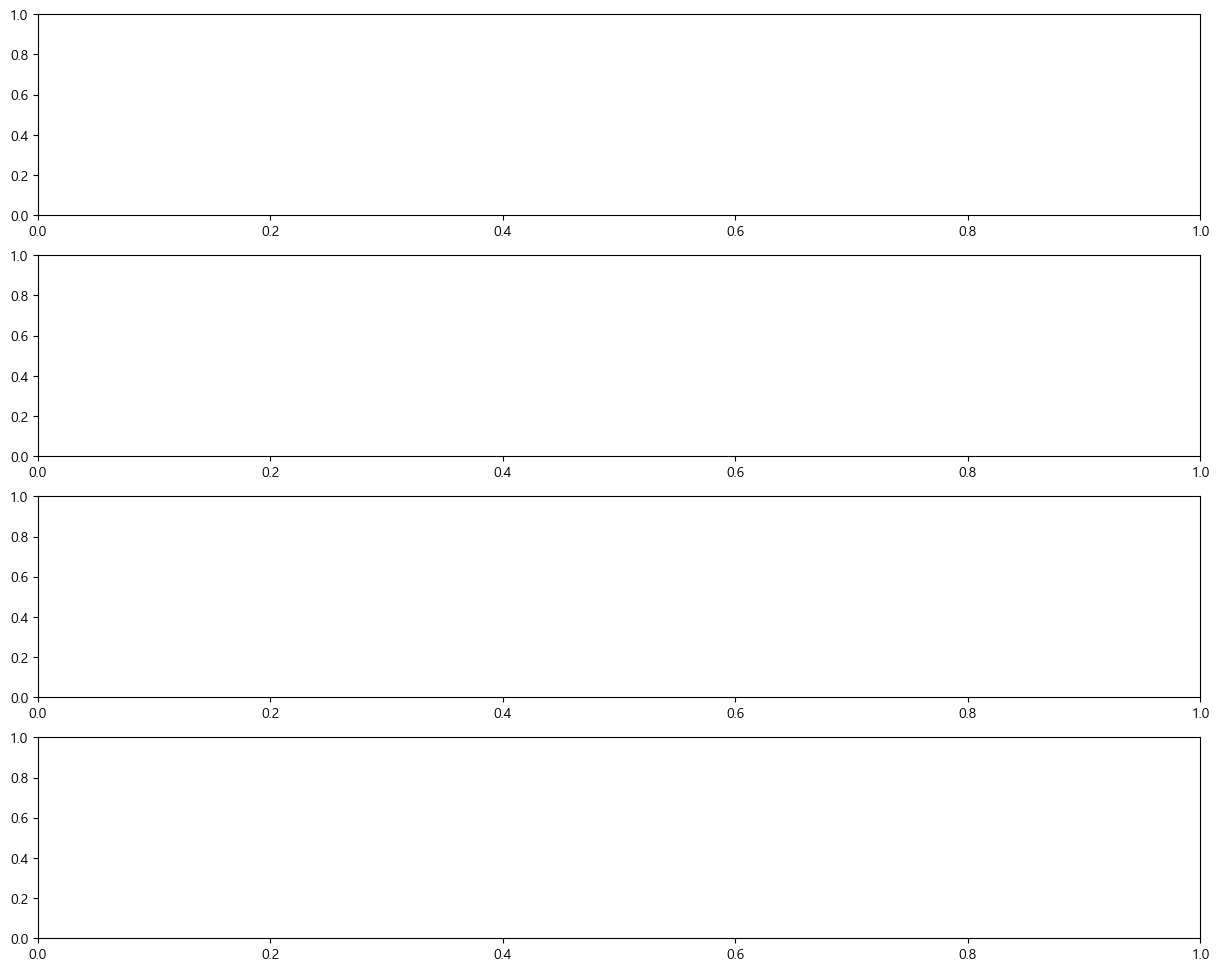

In [3]:
# 3. 진동 패턴 시각화

# 베어링별 채널 그룹화 (공식 문서 참고)
bearings = {
    'Bearing 1': ['ch1', 'ch2'],
    'Bearing 2': ['ch3', 'ch4'],
    'Bearing 3': ['ch5', 'ch6'],  # 내륜결함 (inner race fault)
    'Bearing 4': ['ch7', 'ch8']   # 롤러 요소 결함 (roller element fault)
}

# 시각화
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

for idx, (bearing_name, channels) in enumerate(bearings.items()):
    ax = axes[idx]
    
    # 처음 1000개만 플롯 (전체 20,480개는 너무 많음)
    for ch in channels:
        ax.plot(df_sample[ch].iloc[:1000], label=ch, linewidth=0.5)
    
    # 고장 베어링 표시
    title = f'{bearing_name} 진동 패턴'
    if bearing_name in ['Bearing 3', 'Bearing 4']:
        title += ' ⚠️ (실험 종료 시 고장)'
    
    ax.set_title(f'{title}\n(첫 측정: {first_file})', 
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('샘플 번호 (20kHz 샘플링)')
    ax.set_ylabel('진동 가속도 (g)')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
